In [ ]:
!pip install pandas numpy scikit-learn matplotlib nltk seaborn wordcloud xgboost pickle-mixin


  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=9d754d07ac2c49dc773093daf570c3216590db790b5bd322c96c31e194e453ae
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/Review detection/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df.drop(columns = {'category'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  40432 non-null  float64
 1   label   40432 non-null  object 
 2   text_   40432 non-null  object 
dtypes: float64(1), object(2)
memory usage: 947.8+ KB


In [ ]:
df.rename(columns = {'text_': 'text'}, inplace = True)

In [ ]:
df.head()

,rating,label,text
0,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,5.0,CG,"love it, a great upgrade from the original. I..."
2,5.0,CG,This pillow saved my back. I love the look and...
3,1.0,CG,"Missing information on how to use it, but it i..."
4,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
def encode_label(df):
    labels = {
        'CG': 0,
        'OR': 1
    }

    df['target'] = df['label'].map(labels)

    return df

In [ ]:
df = encode_label(df)
df['target'] = df['target'].fillna(0).replace([np.inf, -np.inf], 0)
df['target'] = df['target'].astype(int)
df.head()

,rating,label,text,target
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",0
1,5.0,CG,"love it, a great upgrade from the original. I...",0
2,5.0,CG,This pillow saved my back. I love the look and...,0
3,1.0,CG,"Missing information on how to use it, but it i...",0
4,5.0,CG,Very nice set. Good quality. We have had the s...,0


In [ ]:
df.drop(columns = {'rating', 'label'}, inplace = True)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

df.sample(10)

,text,target
8688,"Another close spin on the old ones, with the a...",0
31312,Great Laptop. I would recommend this item. H...,0
21705,Needed to add camo to my single shot 12 ga. fo...,1
36032,Plot - Rotten Tomatoes\nA bunch of adults disc...,1
12091,Angel wants to help and our dear mayor is up t...,1
14451,It works really well it looks great and the ma...,0
22015,"Who wouldn't love this patriotic little toy, t...",0
25342,Stopped working after one use still waiting on...,1
27748,At first it did not work. The only problem is ...,0
37567,This thing fit nicely into my toolbox. The in...,0


In [ ]:
df.isnull().sum()

,0
text,0
target,0


In [ ]:
df.duplicated().sum()

np.int64(20)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['target'].value_counts()

,count
target,
1,20215
0,20197


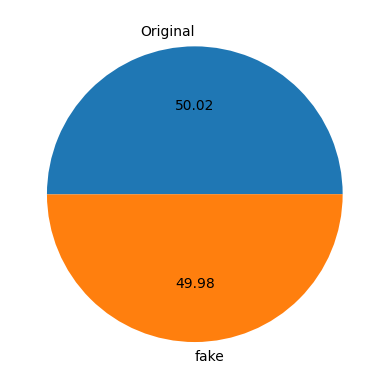

In [ ]:
plt.pie(df['target'].value_counts(), labels=['Original', 'fake'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<Axes: >

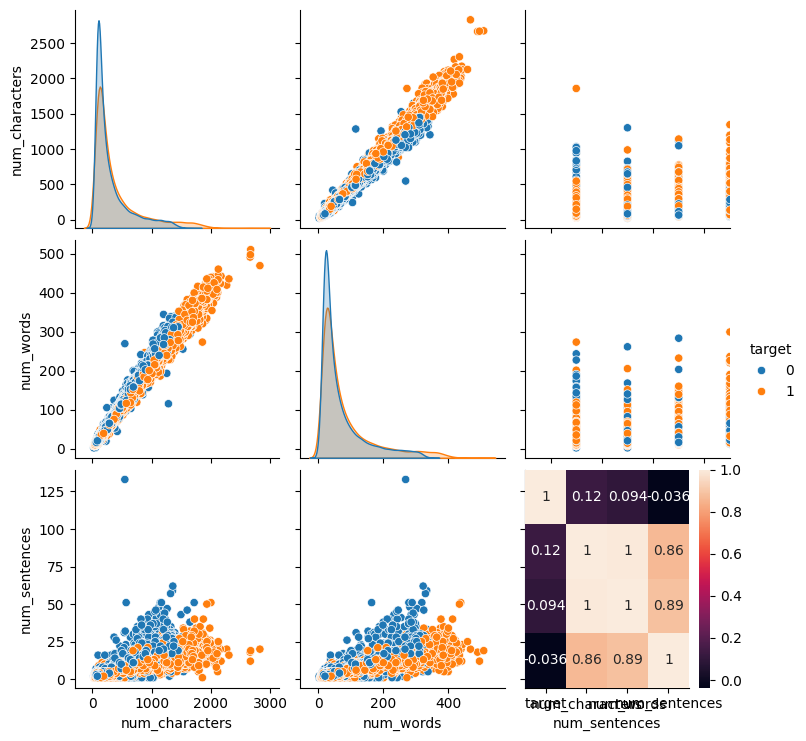

In [ ]:
df.head()
df.describe()
sns.pairplot(df,hue='target')
df_numeric = df.select_dtypes(include = 'number')
sns.heatmap(df_numeric.corr(),annot=True)

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"I've had it for about 6 months now, and it sti...",1,263,60,3,6 month still rank best purchas ever made rega...
1,"I wish I had bought this sooner, but it is a g...",0,77,19,2,wish bought sooner great product price
2,"Next to my pocket screw driver, I use this thi...",1,366,84,6,next pocket screw driver use thing love death ...
3,Took a gamble desperate to complete a Mystery ...,1,269,55,5,took gambl desper complet mysteri gang velma c...
4,I bought this as an addition to another board ...,1,552,120,7,bought addit anoth board board entir made sort...


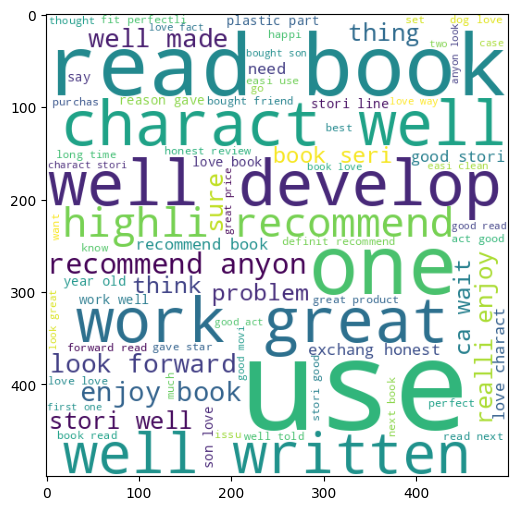

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
fake_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

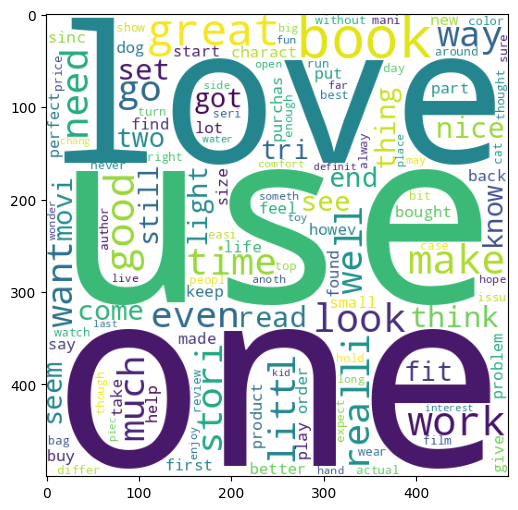

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
original_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(original_wc)

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
print(X.shape)
print(y.shape)

(40412, 3000)
(40412,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df.reset_index(drop = True)

,Algorithm,Accuracy,Precision
0,LR,0.855623,0.855624
1,NB,0.838674,0.839340
2,RF,0.834839,0.836645
3,xgb,0.819498,0.820552
4,AdaBoost,0.696647,0.699762
5,DT,0.611530,0.648048
6,KN,0.503773,0.560408


In [ ]:
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
voting = VotingClassifier(estimators=[('LR', lrc), ('nb', mnb), ('RF', rfc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('nb', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.868241989360386
Precision 0.8785877571755144


In [ ]:
estimators = [('LR', lrc), ('nb', mnb), ('RF', rfc)]
final_estimator = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8557466287269578
Precision 0.8598200899550225


In [ ]:
import pickle

drive_path = "//content/gdrive/MyDrive/Review detection/"

with open(drive_path + "vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open(drive_path + "model.pkl", "rb") as f:
    model = pickle.load(f)


In [ ]:
import os
vectorizer_path = drive_path + "vectorizer.pkl"
model_path = drive_path + "model.pkl"

# Check if the files exist and their sizes
for file in [vectorizer_path, model_path]:
    if os.path.exists(file):
        print(f"{file} exists, size: {os.path.getsize(file)} bytes")
    else:
        print(f"{file} does NOT exist!")

//content/gdrive/MyDrive/Review detection/vectorizer.pkl exists, size: 106701 bytes
//content/gdrive/MyDrive/Review detection/model.pkl exists, size: 147 bytes


In [ ]:
import pickle
import numpy as np


drive_path = "//content/gdrive/MyDrive/Review detection/"


vectorizer = pickle.load(open(drive_path + 'vectorizer.pkl', 'rb'))
model = pickle.load(open(drive_path + 'model.pkl', 'rb'))

def classify_review(review):
    """
    Classifies a given review as real or fake and provides a fakeness score.

    :param review: str, input review text
    :return: dict, classification result and fakeness score
    """

    review_vectorized = vectorizer.transform([review])

    prediction = model.predict(review_vectorized)[0]


    if hasattr(model, "predict_proba"):
        prob_fake = model.predict_proba(review_vectorized)[0][1]
    else:
        prob_fake = float(prediction)


    fakeness_score = round(prob_fake * 100, 2)


    return {
        "review": review,
        "prediction": "Fake" if prediction == 1 else "Real",
        "fakeness_score": fakeness_score
    }


review_text = "This product is amazing! Best purchase ever!"
result = classify_review(review_text)
print(result)


NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.